In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('nonlinear_circles_data.csv')
dataset.head(3)

,x1,x2,label
0,-0.469186,0.247915,1
1,-0.067487,1.006769,0
2,-0.443065,0.027383,1


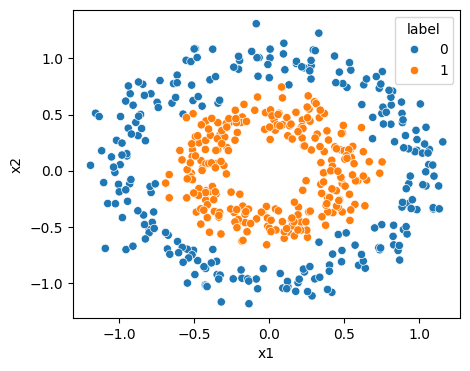

In [3]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = 'x1' , y='x2' , data= dataset , hue='label')
plt.show() 

In [4]:
x = dataset.iloc[: , :-1]
y = dataset['label']

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [9]:
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [13]:
lr.fit(x_train , y_train)

LogisticRegression()

In [15]:
lr.score(x_test , y_test)*100

99.0

## confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix , recall_score , f1_score , precision_score

In [17]:
cf = confusion_matrix(y_test , lr.predict(x_test))
cf

array([[42,  1],
       [ 0, 57]])

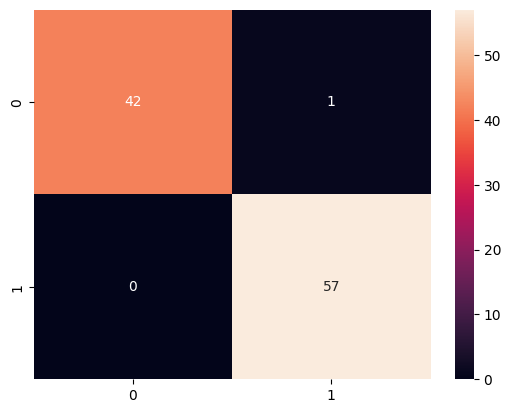

In [18]:
sns.heatmap(cf , annot=True)
plt.show()

In [20]:
precision_score(y_test , lr.predict(x_test))*100

98.27586206896551

In [21]:
recall_score(y_test , lr.predict(x_test))*100

100.0

In [22]:
f1_score(y_test , lr.predict(x_test))*100

99.1304347826087